# Slicing

In [1]:
l = [1, 2, 3, 4, 5]

In [2]:
l[0:2] = ('a', 'b', 'c')

In [3]:
l

['a', 'b', 'c', 3, 4, 5]

In [4]:
l = ['a', 'b', 'c', 'd', 'e']
l[-2:-10:-1]

['d', 'c', 'b', 'a']

In [6]:
list(range(3, -1, -1))

[3, 2, 1, 0]

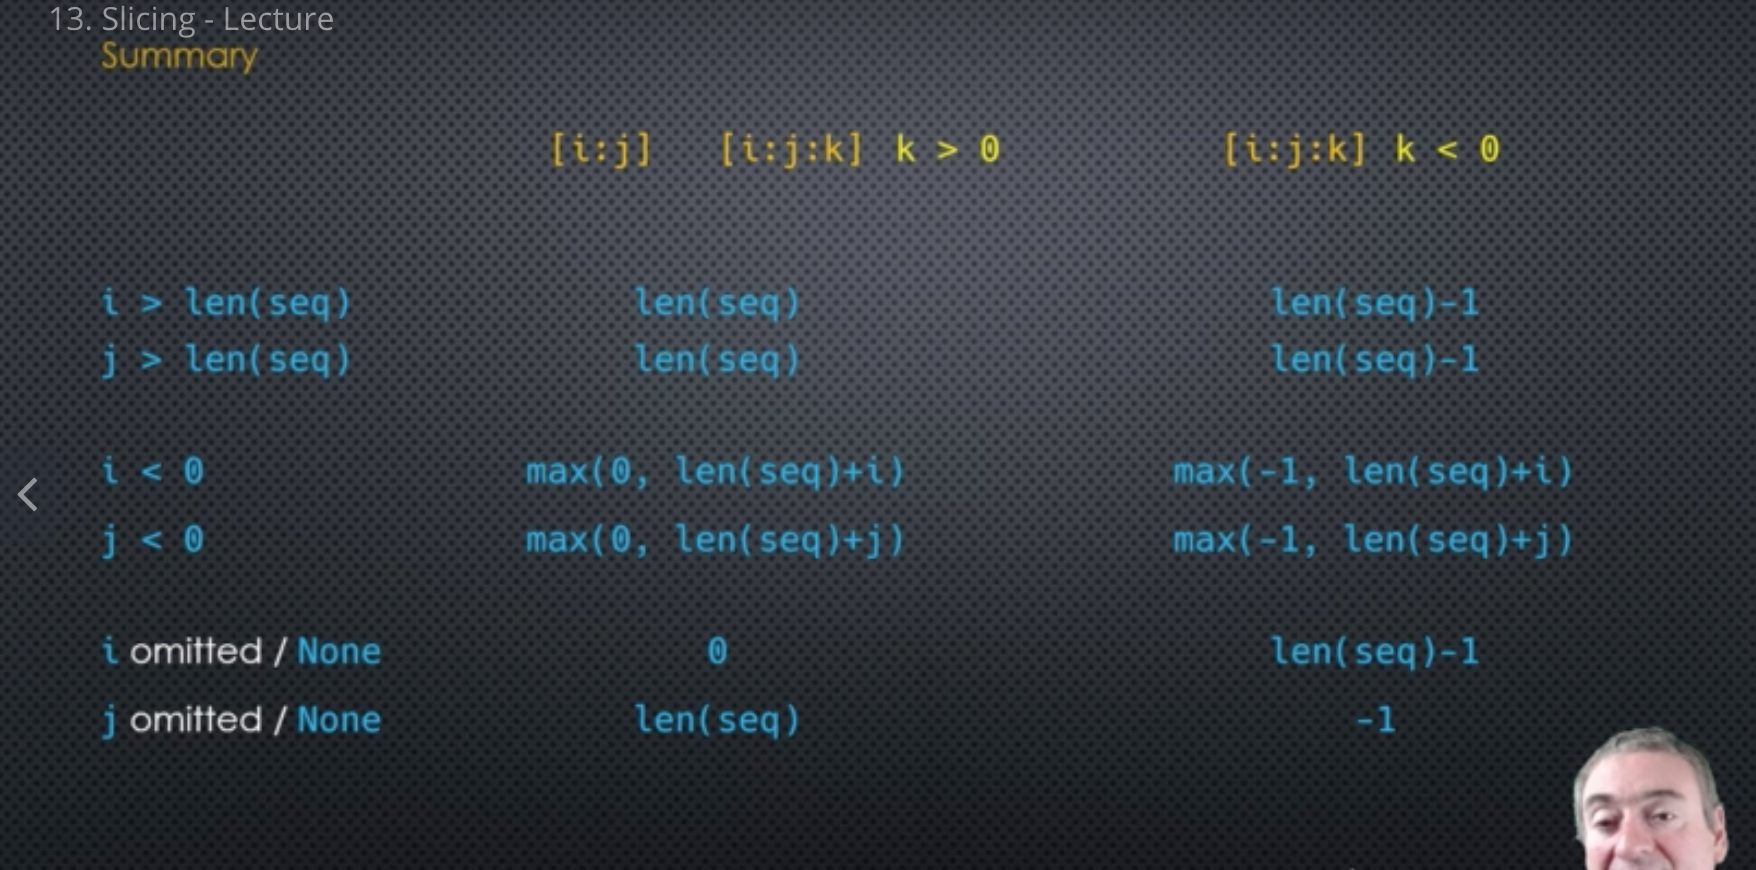

In [7]:
s = slice(0, 2)

In [8]:
s.start

0

In [9]:
s.stop

2

In [11]:
start = 5
stop = 10
step = 2
length = 8
list(range(*slice(start, stop, step).indices(length)))

[5, 7]

# Custom Sequence

- retrieve elements by index using square brackets

\_\_len\_\_
\_\_getitem\_\_

In [12]:
my_list = [1, 2, 3, 4, 5]

In [13]:
len(my_list)

5

In [14]:
my_list.__len__

<method-wrapper '__len__' of list object at 0x10da28bc8>

In [15]:
my_list.__getitem__(2)

3

In [16]:
my_list.__getitem__(slice(None, None, -1))

[5, 4, 3, 2, 1]

In [17]:
index = 0

my_list.__getitem__(index)

1

In [18]:
index = 0
while True:
    try:
        item = my_list.__getitem__(index)
    except IndexError:
        break
    print(item ** 2)
    index += 1

1
4
9
16
25


In [43]:
class Silly:
    def __init__(self, n):
        self.n = n
        
    def __len__(self):
        print("Called __len__")
        return self.n
    
    def __getitem__(self, value):
        print(type(value))
        print(f"You requested item at index {value}")
        return "This is a silly element"

In [44]:
silly = Silly(10)

In [45]:
len(silly)

Called __len__


10

In [46]:
silly.__getitem__(100)

<class 'int'>
You requested item at index 100


'This is a silly element'

In [47]:
silly[0:5:2]

<class 'slice'>
You requested item at index slice(0, 5, 2)


'This is a silly element'

In [49]:
from functools import lru_cache


@lru_cache(2**10)
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [50]:
fib(5)

8

In [51]:
fib(100)

573147844013817084101

In [52]:
class Fib:
    def __init__(self, n):
        self.n = n
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, s):
        if isinstance(s, int):
            if s < 0 or s >= self.n:
                raise IndexError
            else:
                return Fib._fib(s)
    
    @staticmethod
    @lru_cache(2**10)
    def _fib(n):
        if n < 2:
            return 1
        else:
            return Fib._fib(n-1) + Fib._fib(n-2)
            

In [53]:
f = Fib(8)

In [54]:
f[0]

1

In [55]:
f[7]

21

In [56]:
f[8]

IndexError: 

In [57]:
list(f)

[1, 1, 2, 3, 5, 8, 13, 21]

In [58]:
for item in f:
    print(item)

1
1
2
3
5
8
13
21


In [59]:
class Fib:
    def __init__(self, n):
        self.n = n
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, s):
        if isinstance(s, int):
            if s < 0:
                s = self.n + s
            if s < 0 or s >= self.n:
                raise IndexError
            else:
                return Fib._fib(s)
    
    @staticmethod
    @lru_cache(2**10)
    def _fib(n):
        if n < 2:
            return 1
        else:
            return Fib._fib(n-1) + Fib._fib(n-2)
            

In [60]:
fib = Fib(10)

In [61]:
list(fib)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [62]:
fib[0]

1

In [63]:
fib[9]

55

In [64]:
fib[-2]

34

In [72]:
class Fib:
    def __init__(self, n):
        self.n = n
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, s):
        if isinstance(s, int):
            if s < 0:
                s = self.n + s
            if s < 0 or s >= self.n:
                raise IndexError
            else:
                return Fib._fib(s)
        else:
            start, stop, step = s.indices(self.n)
            rng = range(start, stop, step)
            return [Fib._fib(i) for i in rng]
    
    @staticmethod
    @lru_cache(2**10)
    def _fib(n):
        if n < 2:
            return 1
        else:
            return Fib._fib(n-1) + Fib._fib(n-2)
            

In [73]:
fib = Fib(10)

In [74]:
fib[0:4]

[1, 1, 2, 3]

In [75]:
fib[-1:-4:-1]

[55, 34, 21]

In [76]:
list(range(9, 6, -1))

[9, 8, 7]

# Inplace Concatenation

In [78]:
l1 = [1, 2, 3, 4]
l2 = [5, 6]
print(id(l1), l1)
print(id(l2), l2)

4523974216 [1, 2, 3, 4]
4524619720 [5, 6]


In [79]:
l1 = l1 + l2
print(id(l1), l1)

4524618696 [1, 2, 3, 4, 5, 6]


In [82]:
t1 = (1, 2, 3)

In [83]:
l1 = l1 + t1

TypeError: can only concatenate list (not "tuple") to list

In [84]:
l1 = [1, 2, 3, 4]
l2 = [5, 6]
print(id(l1), l1)
print(id(l2), l2)

4522907400 [1, 2, 3, 4]
4522885064 [5, 6]


In [85]:
l1 += l2
print(id(l1), l1)

4522907400 [1, 2, 3, 4, 5, 6]


In [86]:
l1 = [1, 2, 3, 4]
t1 = (5, 6)
print(id(l1), l1)
print(id(t1), t1)

4523723272 [1, 2, 3, 4]
4522107528 (5, 6)


In [87]:
l1 += t1

In [88]:
print(id(l1), l1)

4523723272 [1, 2, 3, 4, 5, 6]


In [89]:
l1 += range(7, 11)

In [90]:
print(id(l1), l1)

4523723272 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [91]:
t1 = (1, 2, 3)
t2 = (4, 5, 6)

In [92]:
print(id(t1), t1)
print(id(t2), t2)

4524296880 (1, 2, 3)
4523841576 (4, 5, 6)


In [95]:
t1 += t2
print(id(t1), t1)

4524283848 (1, 2, 3, 4, 5, 6)


In [96]:
l1 = [1, 2, 3]
print(id(l1), l1)

4523974472 [1, 2, 3]


In [97]:
l1 = l1 * 2

In [98]:
print(id(l1), l1)

4522909384 [1, 2, 3, 1, 2, 3]


In [99]:
def name(**kwargs):
    print(kwargs.get('cnt', 'kaden'))

In [101]:
name()

kaden


In [102]:
l = [1, 2, 3, 4, 5]
l[1:1] = 'abc'

In [103]:
l

[1, 'a', 'b', 'c', 2, 3, 4, 5]

# Mutable Sequences